In [22]:
import tensorflow as tf
import numpy as np
import tensorflow.keras

np.random.seed(20)

In [23]:
X_train, y_train = np.load('X_train.npy'), np.load('y_train.npy')
X_valid, y_valid = np.load('X_valid.npy'), np.load('y_valid.npy')
X_test, y_test = np.load('X_test.npy'), np.load('y_test.npy')

In [24]:
# cnn binary classification model - input shape is 125 x 250 x 1 kernel size is 3 x 3
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(125, 250, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [25]:
# copile model with sgd, adam
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [26]:
# train model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
157/157 [==============================] - 2s 13ms/step - loss: 0.6944 - accuracy: 0.4908 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 2/50
157/157 [==============================] - 2s 11ms/step - loss: 0.6927 - accuracy: 0.5108 - val_loss: 0.6922 - val_accuracy: 0.5240
Epoch 3/50
157/157 [==============================] - 2s 11ms/step - loss: 0.6919 - accuracy: 0.5214 - val_loss: 0.6912 - val_accuracy: 0.5200
Epoch 4/50
157/157 [==============================] - 2s 11ms/step - loss: 0.6905 - accuracy: 0.5346 - val_loss: 0.6897 - val_accuracy: 0.5420
Epoch 5/50
157/157 [==============================] - 2s 12ms/step - loss: 0.6878 - accuracy: 0.5504 - val_loss: 0.6940 - val_accuracy: 0.5000
Epoch 6/50
157/157 [==============================] - 2s 12ms/step - loss: 0.6841 - accuracy: 0.5786 - val_loss: 0.6879 - val_accuracy: 0.5000
Epoch 7/50
157/157 [==============================] - 2s 12ms/step - loss: 0.6777 - accuracy: 0.5864 - val_loss: 0.6762 - val_accuracy: 0.5900

In [27]:
# evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)

16/16 [==============================] - 0s 4ms/step - loss: 1.4630 - accuracy: 0.5680


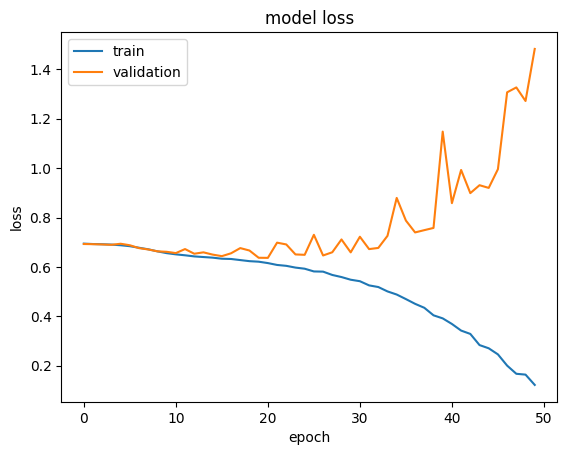

In [28]:
# plot training history for loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()